In [ ]:
from pathlib import Path 
import numpy as np
import seaborn as sns
import pandas as pd    
from matplotlib import pyplot as plt 
import sys 

sys.path.insert(0, "/home/t-eliass/miso_sm")
from scripts.leven import run_main

In [ ]:
from collections import defaultdict 

def get_df(root_path, gold_path, train_path, fxn_of_interest="FindManager"):
    data = defaultdict(lambda: defaultdict(list))
    for path in root_path.glob(f"{fxn_of_interest}_*_seed/*_100/"):
        setting = path.name
        pred_path = path.joinpath("translate_output/test_valid.tgt")

        train_path = f"/home/t-eliass/resources/data/smcalflow_samples_curated/{fxn_of_interest}/{setting}/train.tgt"
        if not pred_path.exists():
            continue
        correct_dist, incorrect_dist = run_main(gold_path, pred_path, train_path, fxn_of_interest, do_anonymize=True)
        data[setting]["correct"].append(correct_dist)
        data[setting]["incorrect"].append(incorrect_dist)

    return data

In [ ]:
def get_correct_incorrect(root_path, fxn_of_interest = "FindManager"):
    root_path = Path(root_path)
    fm_df = get_df(root_path, "/home/t-eliass/resources/data/smcalflow.agent.data/test_valid.tgt", "/home/t-eliass/resources/data/smcalflow.agent.data/train.tgt", fxn_of_interest=fxn_of_interest)

    correct_df = pd.DataFrame(columns=["setting", "order", "distance", "type"], dtype=float)
    incorrect_df = pd.DataFrame(columns=["setting", "order", "distance", "type"], dtype=float)

    def get_order(key):
        k1, k2 = key.split("_")
        if k1 == "max":
            val = np.inf
        else:
            val = int(k1)
        k2 = int(k2)
        return val + k2


    for setting in fm_df.keys():
        # TODO: change later 
        if setting.split("_")[1] != "100":
            continue
        correct_list = fm_df[setting]["correct"]
        incorrect_list = fm_df[setting]["incorrect"]
        for c in correct_list:
            correct_df = correct_df.append({"setting": setting, "order": get_order(setting), "distance": c, "type": "correct"}, ignore_index=True)
        for c in incorrect_list:
            incorrect_df = incorrect_df.append({"setting": setting, "order": get_order(setting), "distance": c, "type": "incorrect"}, ignore_index=True)
        
    total_df = pd.concat([correct_df, incorrect_df])

    correct_df = correct_df.sort_values(['order']).reset_index(drop=True)
    incorrect_df = incorrect_df.sort_values(['order']).reset_index(drop=True)
    total_df = total_df.sort_values(['order']).reset_index(drop=True)
    return correct_df, incorrect_df, total_df 

def plot(total_df, title):
    # #, columns = ["setting", "percent error"])
    fig, ax = plt.subplots(1,1, figsize=(6,5))
    sns.lineplot(data=total_df, x = "setting", y = "distance", ax = ax, hue="type")
    sns.despine()
    # sns.lineplot(data=incorrect_df, x = "setting", y = "distance", ax = ax, color="b")
    plt.xticks(rotation=45)
    plt.title(title)

In [ ]:
# correct_df, incorrect_df, min_pair_total_df = get_correct_incorrect("/home/t-eliass/amlt_models/transformer_min_pair_generated_v100/") 
correct_df, incorrect_df, base_total_df = get_correct_incorrect("/home/t-eliass/amlt_models/transformer/") 

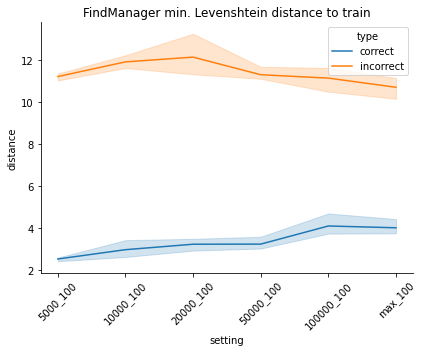

In [13]:
# plot(min_pair_total_df, "FindManager Min Pair Minimum Levenshtein distance to a training example") 
plot(base_total_df, "FindManager min. Levenshtein distance to train") 
plt.tight_layout()
plt.savefig("/home/t-eliass/papers/incremental_function_learning/figures/FindManager_levenshtein_anon.pdf")

In [ ]:
correct_df, incorrect_df, tomorrow_total_df = get_correct_incorrect("/home/t-eliass/amlt_models/transformer/", fxn_of_interest="Tomorrow") 

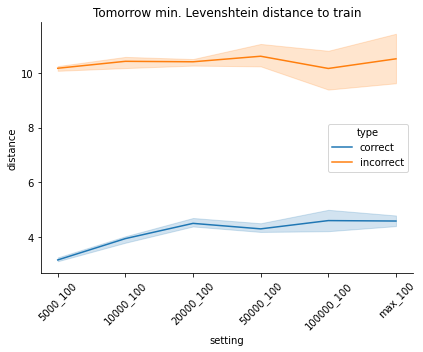

In [15]:
plot(tomorrow_total_df, "Tomorrow min. Levenshtein distance to train") 

plt.tight_layout()
plt.savefig("/home/t-eliass/papers/incremental_function_learning/figures/Tomorrow_levenshtein_anon.pdf")

In [ ]:
def get_df_total(root_path,  fxn_of_interest="FindManager"):
    pred_path = root_path.joinpath("translate_output/test_valid.tgt")
    gold_path = "/home/t-eliass/resources/data/smcalflow.agent.data/test_valid.tgt"
    train_path = f"/home/t-eliass/resources/data/smcalflow.agent.data/train.tgt"
    fxn_of_interest = (fxn_of_interest, None)
    correct_dist, incorrect_dist = run_main(gold_path, pred_path, train_path, fxn_of_interest, do_anonymize=True)

    return correct_dist, incorrect_dist 

def get_correct_incorrect_total(root_path, fxn_of_interest):
    root_path = Path(root_path)
    correct_dist, incorrect_dist = get_df_total(root_path, fxn_of_interest=fxn_of_interest)

    print(f"Average correct distance: {np.mean(correct_dist)}")
    print(f"Average incorrect distance: {np.mean(incorrect_dist)}")


In [ ]:
get_correct_incorrect_total("/home/t-eliass/amlt_models/transformer_full/", "FindManager") 